# Retail Expansion Navigator


# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import folium
from folium.plugins import HeatMap



## Load Dataset


In [ ]:
def load_data():
    data = {
        'Location': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'Latitude': [34.05, 40.71, 41.88, 37.77, 29.76, 33.45, 39.95, 32.78, 30.27, 25.76],
        'Longitude': [-118.25, -74.01, -87.63, -122.42, -95.36, -112.07, -75.16, -96.80, -97.74, -80.19],
        'Population': [10000, 15000, 20000, 25000, 30000, 12000, 18000, 22000, 28000, 9000],
        'Average_Income': [50000, 60000, 70000, 80000, 90000, 55000, 65000, 75000, 85000, 45000],
        'Competitors': [3, 2, 5, 4, 1, 3, 2, 4, 1, 5],
        'Foot_Traffic': [2000, 2500, 3000, 3500, 4000, 2100, 2600, 3100, 3600, 1900],
        'Sales_Potential': [100000, 150000, 200000, 250000, 300000, 110000, 160000, 210000, 260000, 90000]
    }
    return pd.DataFrame(data)



## Data Preprocessing


In [ ]:
def preprocess_data(df):
    df.fillna(df.median(numeric_only=True), inplace=True)
    df['Competition_Intensity'] = df['Competitors'] / df['Population']
    df['Income_Per_Capita'] = df['Average_Income'] / df['Population']
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[['Population', 'Average_Income', 'Competitors', 'Foot_Traffic', 'Competition_Intensity', 'Income_Per_Capita']])
    scaled_df = pd.DataFrame(scaled_features, columns=['Population', 'Average_Income', 'Competitors', 'Foot_Traffic', 'Competition_Intensity', 'Income_Per_Capita'])
    df = pd.concat([df, scaled_df.add_prefix('Scaled_')], axis=1)
    return df



## Exploratory Data Analysis (EDA)


In [ ]:
def perform_eda(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    sns.pairplot(df[['Population', 'Average_Income', 'Competitors', 'Foot_Traffic', 'Sales_Potential']])
    plt.suptitle("Pairplot of Key Features", y=1.02)
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[['Population', 'Average_Income', 'Foot_Traffic']])
    plt.title("Boxplot of Demographic Features")
    plt.show()

    # Sales Potential by Competitors
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Competitors', y='Sales_Potential', data=df)
    plt.title("Sales Potential vs Competitors")
    plt.show()

    # Population vs Sales
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Population', y='Sales_Potential', hue='Average_Income', data=df, palette='coolwarm')
    plt.title("Population vs Sales Potential (Colored by Income)")
    plt.show()



## Clustering


In [ ]:
def perform_clustering(df):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(df[[
        'Scaled_Population', 'Scaled_Average_Income', 'Scaled_Competitors',
        'Scaled_Foot_Traffic', 'Scaled_Competition_Intensity', 'Scaled_Income_Per_Capita']])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df, palette='viridis', s=100)
    plt.title("Geographic Clustering of Locations")
    plt.show()

    return df



## Prediction


In [ ]:
def predict_sales_potential(df):
    X = df[[
        'Scaled_Population', 'Scaled_Average_Income', 'Scaled_Competitors',
        'Scaled_Foot_Traffic', 'Scaled_Competition_Intensity', 'Scaled_Income_Per_Capita']]
    y = df['Sales_Potential']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importances")
    plt.tight_layout()
    plt.show()

    df['Predicted_Sales_Potential'] = model.predict(X)
    return df


## Main

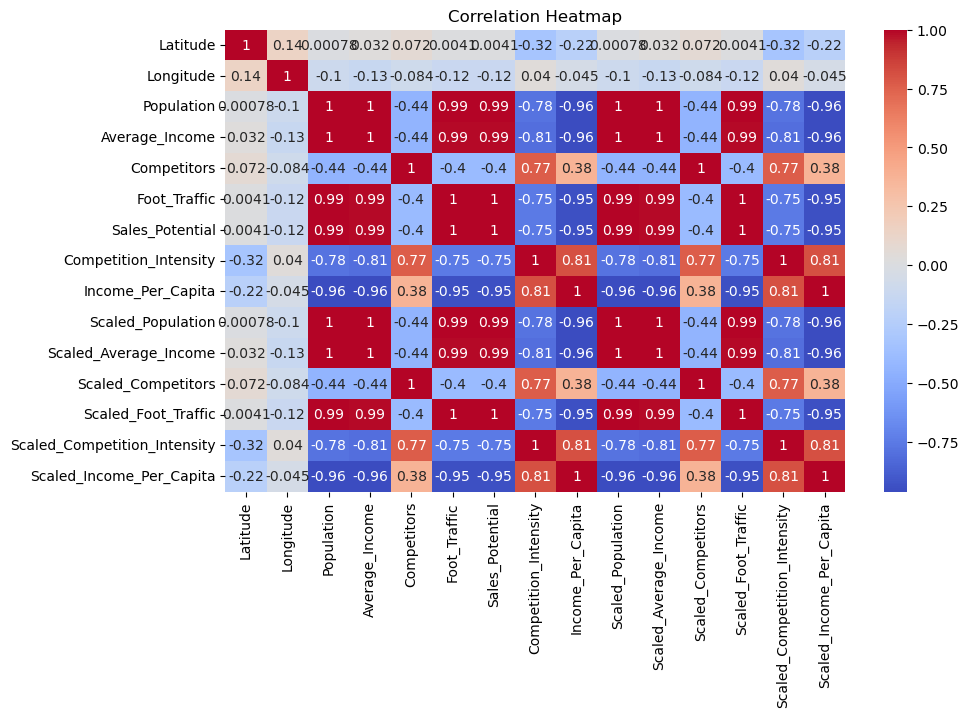

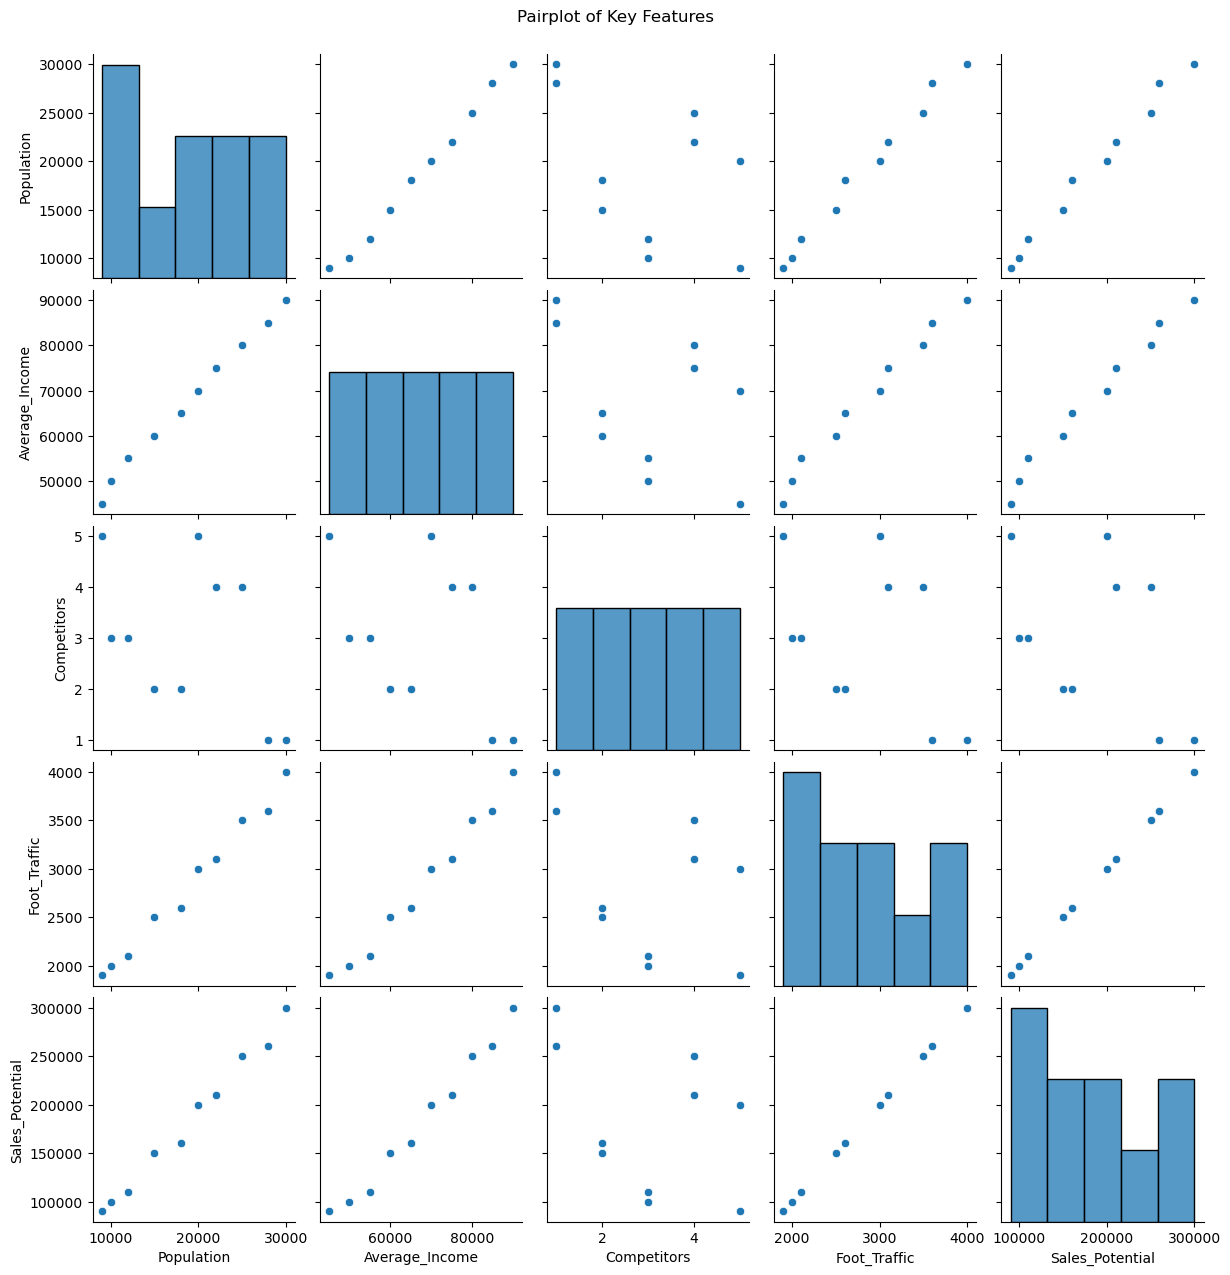

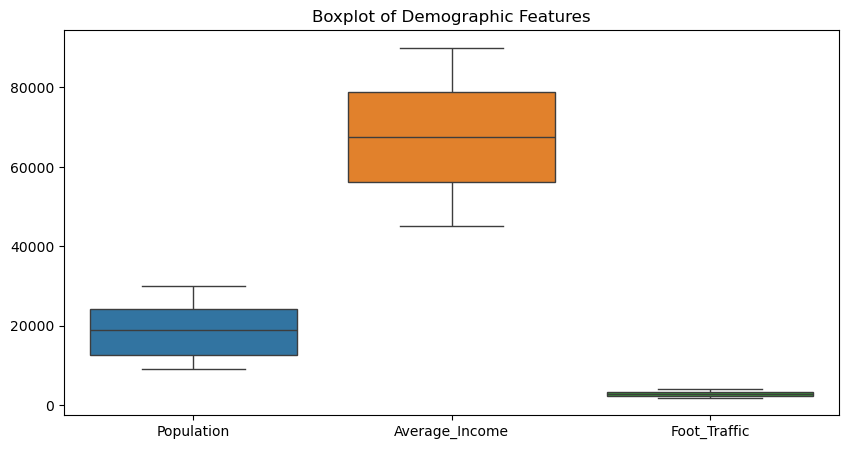

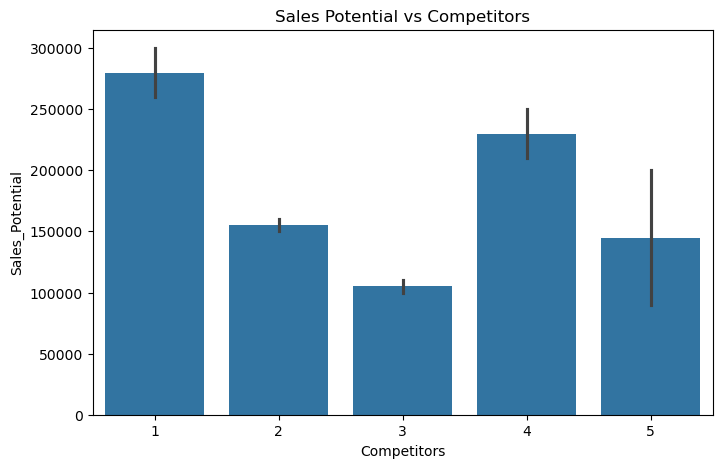

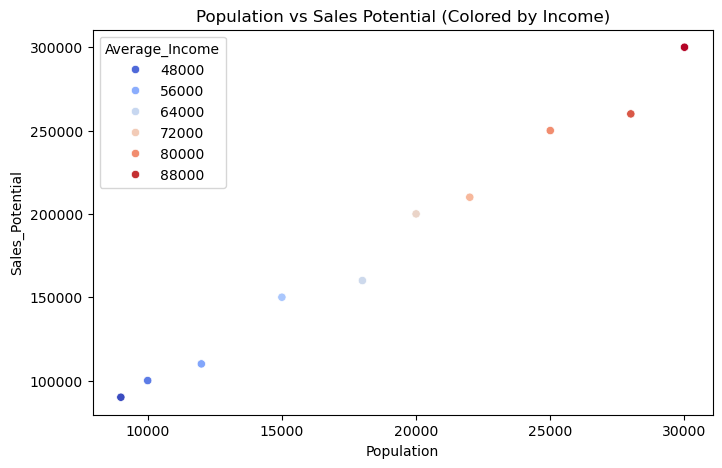

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


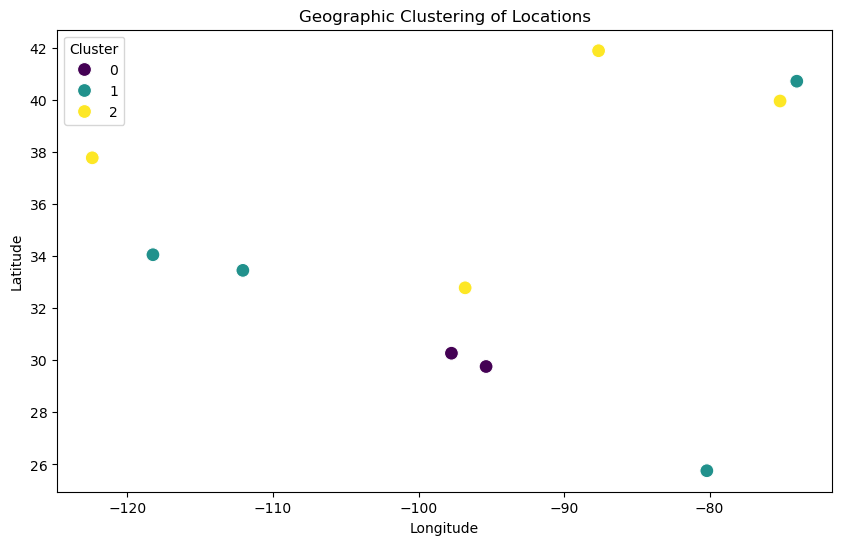

Mean Squared Error: 140065000.00


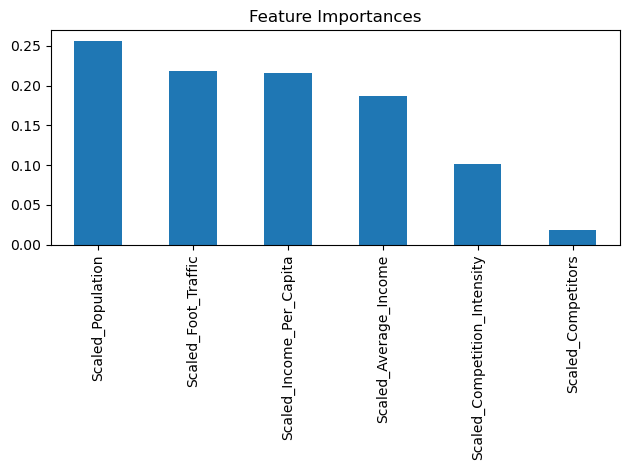

Map saved as 'retail_expansion_map.html'.
Top 5 Locations for Expansion:
  Location  Latitude  Longitude  Population  Average_Income  \
4        E     29.76     -95.36       30000           90000   
8        I     30.27     -97.74       28000           85000   
3        D     37.77    -122.42       25000           80000   
7        H     32.78     -96.80       22000           75000   
2        C     41.88     -87.63       20000           70000   

   Predicted_Sales_Potential  Rank  
4                   278800.0   1.0  
8                   276300.0   2.0  
3                   241900.0   3.0  
7                   207900.0   4.0  
2                   190200.0   5.0  


In [ ]:
if __name__ == "__main__":
    df = load_data()
    df = preprocess_data(df)
    perform_eda(df)
    df = perform_clustering(df)
    df = predict_sales_potential(df)
    visualize_map(df)
    generate_recommendations(df)



## Folium Visualization


In [ ]:
def visualize_map(df):
    m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

    for _, row in df.iterrows():
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=6,
            color='blue' if row['Cluster'] == 0 else 'green' if row['Cluster'] == 1 else 'red',
            fill=True,
            fill_opacity=0.7,
            popup=f"Location: {row['Location']}, Sales: {row['Predicted_Sales_Potential']:.0f}"
        ).add_to(m)

    heat_data = [[row['Latitude'], row['Longitude'], row['Predicted_Sales_Potential']] for _, row in df.iterrows()]
    HeatMap(heat_data).add_to(m)

    m.save("retail_expansion_map.html")
    print("Map saved as 'retail_expansion_map.html'.")



## Recommendations


In [ ]:
def generate_recommendations(df):
    df['Rank'] = df['Predicted_Sales_Potential'].rank(ascending=False)
    top_locations = df[df['Rank'] <= 5].sort_values(by='Rank')

    print("Top 5 Locations for Expansion:")
    print(top_locations[['Location', 'Latitude', 'Longitude', 'Population', 'Average_Income', 'Predicted_Sales_Potential', 'Rank']])
